IMDB - Sentiment analysis 


Import libraries

In [ ]:

import keras
import numpy as np
from keras import  models
from keras import layers

import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data,train_labels),(test_data,tesst_labels) = imdb.load_data(num_words=10000)

In [10]:
word_index = imdb.get_word_index()

In [11]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ''.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]]
)

In [18]:
def vectorized_sequence(sequences,dimension=10000):
    result = np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
        result[i,sequences] = 1
    return result
    

In [19]:
x_train = vectorized_sequence(train_data)
x_test = vectorized_sequence(test_data)

In [40]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(tesst_labels).astype('float32')

In [50]:

imdb_model = models.Sequential()
imdb_model.add(layers.Dense(16,activation='relu',input_shape = (10000,)))
imdb_model.add(layers.Dense(16,activation='relu'))
imdb_model.add(layers.Dense(1,activation='sigmoid'))


In [51]:
imdb_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [52]:
x_val = x_train[:10000]
x_train_left = x_train[10000:]

y_val = y_train[:10000]
y_leftover = y_train[10000 :]

In [53]:
result = imdb_model.fit(x_train_left,y_leftover,epochs=20,batch_size=512,validation_data= (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 7s 184ms/step - loss: 0.5288 - accuracy: 0.7815 - val_loss: 0.4112 - val_accuracy: 0.8618
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3215 - accuracy: 0.9007 - val_loss: 0.3318 - val_accuracy: 0.8740
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2354 - accuracy: 0.9231 - val_loss: 0.2833 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1859 - accuracy: 0.9403 - val_loss: 0.2871 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1517 - accuracy: 0.9529 - val_loss: 0.2851 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1259 - accuracy: 0.9607 - val_loss: 0.2903 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1065 - accuracy: 0.9675 - val_loss: 0.3002 - val_accuracy: 0.8863
Epoch 8/20
3

In [58]:
result_info = result.history

In [66]:
loss = result_info['loss']
validation_loss = result_info['val_loss']
accuracy  = result_info['accuracy']
epochs = range(1,len(accuracy)+1 )

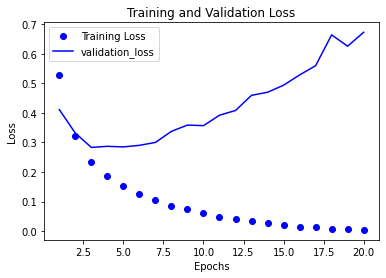

In [130]:
plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,validation_loss,'b',label = 'validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
          

In [70]:
validation_accuracy = result_info['val_accuracy']

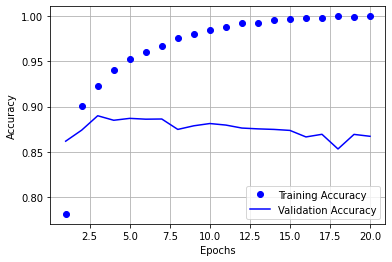

In [73]:
plt.plot(epochs,accuracy,'bo',label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

In [ ]:
c_model = models.Sequential()
c_model.add(layers.Dense(16,activation='relu',input_shape = (10000,)))
c_model.add(layers.Dense(16,activation='relu'))
c_model.add(layers.Dense(1,activation='sigmoid'))